In [2]:
import os

In [3]:
data_dir = r'Path to your dataset'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [8]:
test_path

'C:\\Users\\tanma\\OneDrive\\Desktop\\Sample_images\\test\\'

In [9]:
os.listdir(test_path)

['negative', 'positive']

In [10]:
os.listdir(train_path)

['negative', 'positive']

In [11]:
os.listdir(train_path+'positive')[0]

'00001.jpg'

In [12]:
pos_tower =train_path+'positive\\'+'00001.jpg'


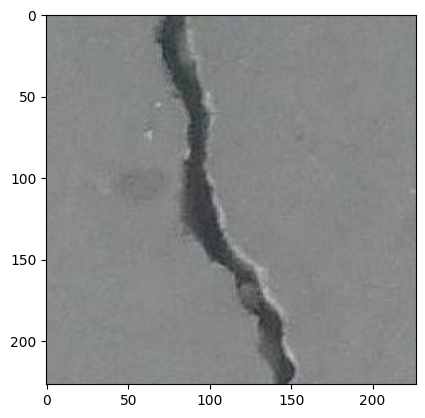

In [13]:
plt.imshow(imread(pos_tower))

In [15]:
os.listdir(train_path+'negative')[1]

'00002.jpg'

In [66]:
neg_tower = train_path+'negative\\'+'00002.jpg'

In [16]:
neg_tower

In [17]:
neg_tower = imread(neg_tower)

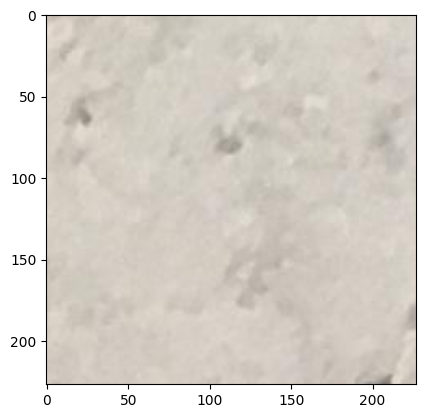

In [18]:
plt.imshow(neg_tower)

In [19]:
len(os.listdir(train_path+'positive'))

16000

In [20]:
len(os.listdir(train_path+'negative'))

16000

In [21]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'negative'):
    
    img = imread(test_path+'negative\\'+image_filename)
    d1,d2,colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [22]:
np.mean(dim1)

227.0

In [23]:
np.mean(dim2)

227.0

In [24]:
image_shape = (227,227,3)

In [25]:
227*227*3

154587

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
imread(pos_tower).max()

195

In [28]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1.0/255,  
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

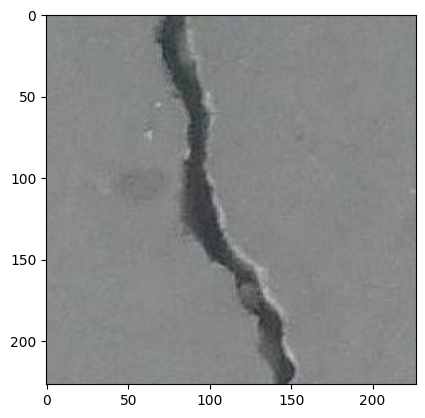

In [29]:
pos_image = imread(pos_tower)
plt.imshow(pos_image)

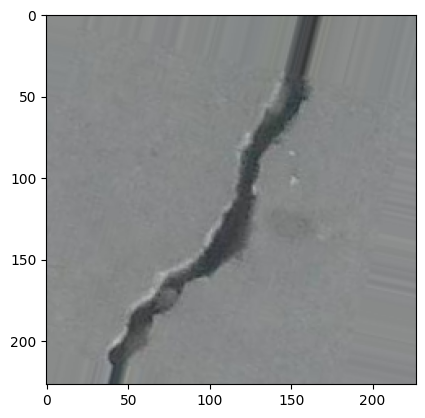

In [34]:
plt.imshow(image_gen.random_transform(pos_image))

In [35]:
image_gen.flow_from_directory(train_path)

Found 32000 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(test_path)

Found 8000 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential


In [38]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)      

In [42]:
from tensorflow.keras.callbacks import EarlyStopping


In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [44]:
batch_size = 16

In [45]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size =batch_size,
                                               class_mode='binary')

Found 32000 images belonging to 2 classes.


In [46]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size =batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 8000 images belonging to 2 classes.


In [47]:
train_image_gen.class_indices

{'negative': 0, 'positive': 1}

In [48]:
results = model.fit(train_image_gen,epochs=10,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
2000/2000 [==============================] - 628s 314ms/step - loss: 0.2357 - accuracy: 0.9226 - val_loss: 0.0542 - val_accuracy: 0.9851
Epoch 2/10
2000/2000 [==============================] - 594s 297ms/step - loss: 0.0680 - accuracy: 0.9800 - val_loss: 0.0590 - val_accuracy: 0.9826
Epoch 3/10
2000/2000 [==============================] - 599s 300ms/step - loss: 0.0595 - accuracy: 0.9823 - val_loss: 0.0419 - val_accuracy: 0.9876
Epoch 4/10
2000/2000 [==============================] - 603s 301ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 5/10
2000/2000 [==============================] - 595s 297ms/step - loss: 0.0482 - accuracy: 0.9857 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 6/10
2000/2000 [==============================] - 597s 298ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 7/10
2000/2000 [==============================] - 597s 298ms/step - loss: 0.0438 - accuracy: 0.9869 - val_

In [49]:
losses = pd.DataFrame(model.history.history)

<Axes: >

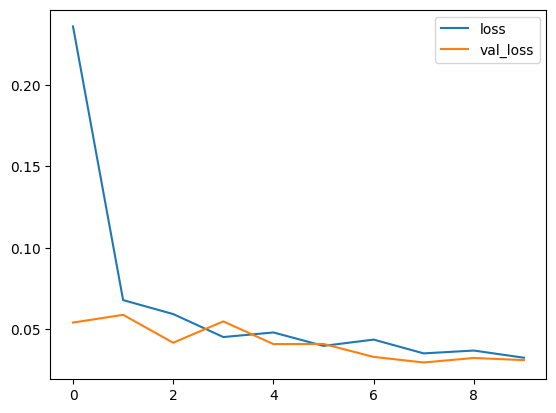

In [50]:
losses[['loss','val_loss']].plot()

In [51]:
model.evaluate(test_image_gen)

500/500 [==============================] - 60s 119ms/step - loss: 0.0304 - accuracy: 0.9906


[0.030437033623456955, 0.9906250238418579]

In [54]:
model.save('model.h5')

In [55]:
pred = model.predict(test_image_gen)

500/500 [==============================] - 60s 121ms/step


In [56]:
pred

array([[0.00119485],
       [0.00119485],
       [0.7010397 ],
       ...,
       [0.9999999 ],
       [1.        ],
       [1.        ]], dtype=float32)

In [57]:
predictions = pred>0.98

In [58]:
predictions


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [59]:
len(pred)

8000

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4000
           1       1.00      0.97      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [62]:
confusion_matrix(test_image_gen.classes,predictions)

array([[3995,    5],
       [ 105, 3895]], dtype=int64)

In [63]:
neg_tower

array([[[209, 199, 189],
        [208, 198, 188],
        [205, 195, 185],
        ...,
        [216, 211, 205],
        [216, 211, 205],
        [216, 211, 205]],

       [[207, 197, 187],
        [206, 196, 186],
        [203, 193, 183],
        ...,
        [216, 211, 205],
        [216, 211, 205],
        [216, 211, 205]],

       [[204, 194, 184],
        [203, 193, 183],
        [202, 192, 182],
        ...,
        [216, 211, 205],
        [216, 211, 205],
        [216, 211, 205]],

       ...,

       [[214, 205, 196],
        [213, 204, 195],
        [210, 201, 192],
        ...,
        [202, 193, 184],
        [202, 193, 184],
        [202, 193, 186]],

       [[215, 206, 197],
        [213, 204, 195],
        [210, 201, 192],
        ...,
        [204, 195, 186],
        [204, 195, 186],
        [204, 195, 186]],

       [[217, 208, 199],
        [214, 205, 196],
        [210, 201, 192],
        ...,
        [207, 198, 189],
        [207, 198, 189],
        [207, 198, 189]]

In [64]:
from tensorflow.keras.preprocessing import image

In [67]:
my_image = image.load_img(neg_tower,target_size=image_shape)

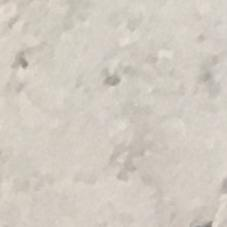

In [68]:
my_image

In [69]:
my_img_array = image.img_to_array(my_image)

In [70]:
my_img_array.shape

(227, 227, 3)

In [71]:
my_img_array = np.expand_dims(my_img_array,axis=0)

In [72]:
my_img_array.shape

(1, 227, 227, 3)

In [73]:
if(model.predict(my_img_array) > 0.9):
    print('Crack')
else:
    print('Not crack')


1/1 [==============================] - 0s 57ms/step
Not crack


In [ ]:
pos_tower

In [75]:
my_image_1 = image.load_img(pos_tower,target_size=image_shape)

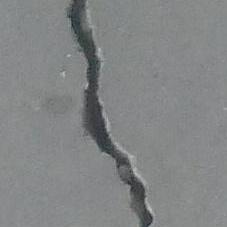

In [76]:
my_image_1

In [77]:
my_img_1_array = image.img_to_array(my_image_1)

In [78]:
my_img_1_array.shape

(227, 227, 3)

In [79]:
my_img_1_array = np.expand_dims(my_img_1_array,axis=0)

In [80]:
my_img_1_array.shape

(1, 227, 227, 3)

In [81]:
if(model.predict(my_img_1_array) > 0.9):
    print('Crack')
else:
    print('Not crack')


1/1 [==============================] - 0s 19ms/step
Crack
